In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf

print("Tensorflow Version: ", tf.__version__)

2022-03-27 15:00:35.737722: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-27 15:00:35.738162: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Tensorflow Version:  2.4.0


In [5]:
from model_builder import *

weight_file = "./results/res_10_15_6_False_0.06_False_0.04/weights/weights.h5"
model = build_model()
model.build(input_shape=tf.TensorShape([None,32, 32, 3]))
model.load_weights(weight_file)

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_8 (Dropout)          (None, 32, 32, 3)         0         
_________________________________________________________________
zero_padding2d_7 (ZeroPaddin (None, 34, 34, 3)         0         
_________________________________________________________________
conv2d_quant_7 (Conv2D_quant (None, 32, 32, 64)        1792      
_________________________________________________________________
dropout_9 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
zero_padding2d_8 (ZeroPaddin (None, 34, 34, 64)        0         
_________________________________________________________________
conv2d_quant_8 (Conv2D_quant (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 64)       

## Visualizing the Output

In [51]:
from get_dataset import *
from tqdm import tqdm
from tensorflow.keras.models import Model

trainset, testset = build_dataset()
img_set = trainset

convLayers = []
for layer in model.layers:
    if 'conv2d' in layer.name:
        convLayers.append(layer)

featureExtractor = Model(model.input, [x.output for x in convLayers])

In [24]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train_), (x_test, y_test_) = cifar10.load_data()
x_train = 2*x_train.astype('float32') / 255 -1
x_test = 2*x_test.astype('float32') / 255 -1

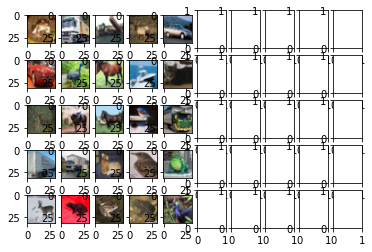

In [28]:
fig, ax = plt.subplots(5, 10)
for i in range(25):
    ax[i//5][i%5].imshow(np.interp(x_train[i], [-1, 1], [0,1]).reshape(32, 32, 3))
    if i >= 24: break

In [64]:
f = featureExtractor(tf.expand_dims(x_train[1], 0))

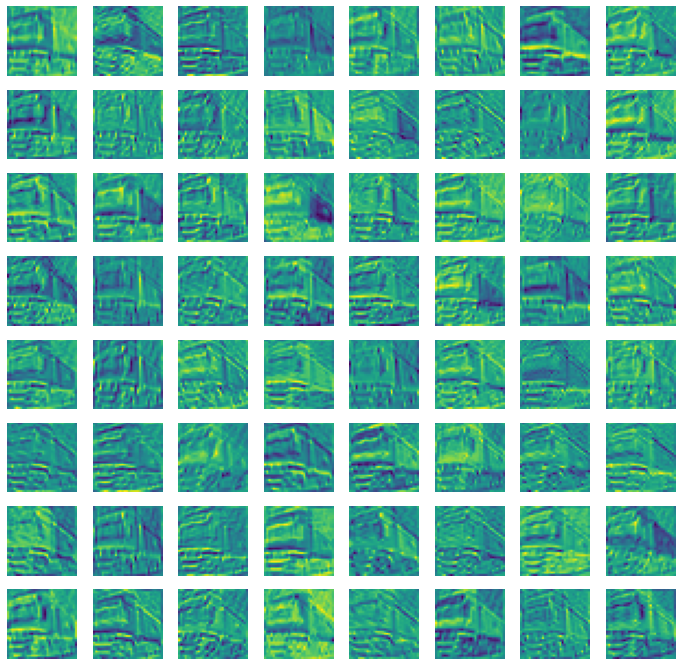

In [65]:
fig, ax = plt.subplots(8, 8, figsize = (12, 12))
for i in range(64):
    ax[i//8][i%8].imshow(f[0].numpy()[0, :, :, i].reshape(32, 32))
    ax[i//8][i%8].set_axis_off()

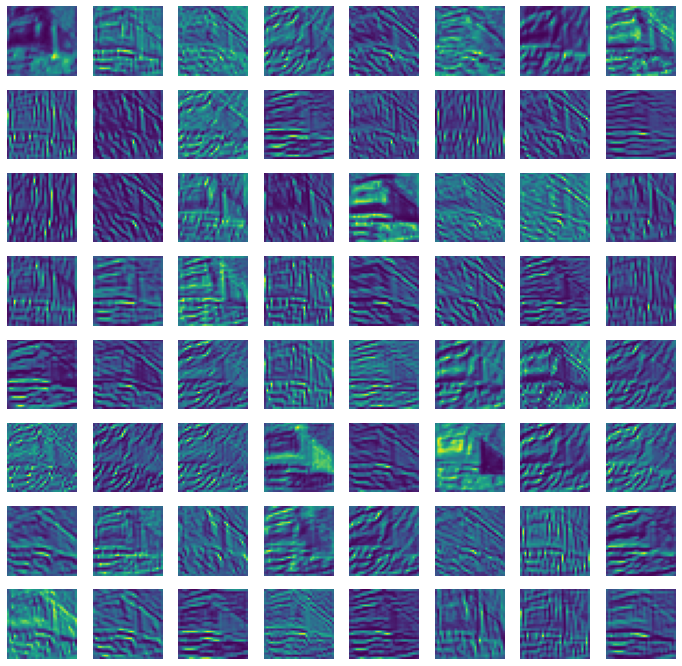

In [66]:
fig, ax = plt.subplots(8, 8, figsize = (12, 12))
for i in range(64):
    ax[i//8][i%8].imshow(f[1].numpy()[0, :, :, i].reshape(32, 32))
    ax[i//8][i%8].set_axis_off()

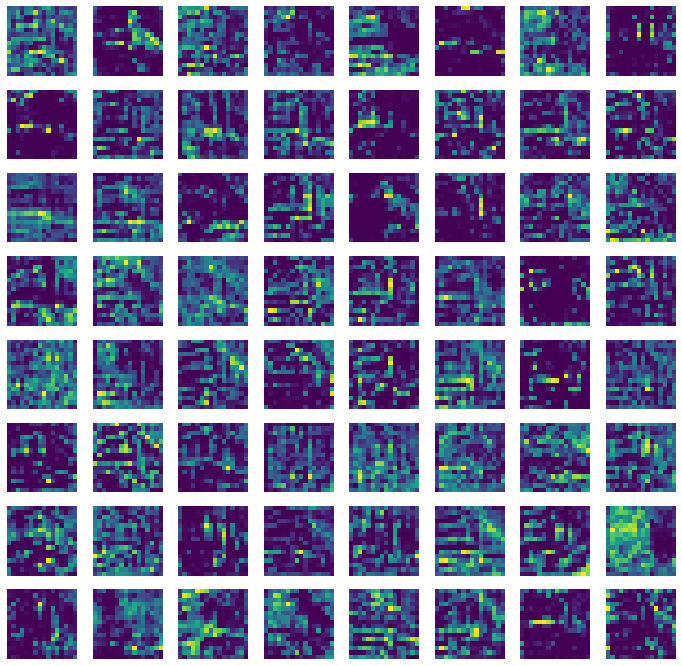

In [67]:
fig, ax = plt.subplots(8, 8, figsize = (12, 12))
for i in range(64):
    ax[i//8][i%8].imshow(f[2].numpy()[0, :, :, i].reshape(16, 16))
    ax[i//8][i%8].set_axis_off()

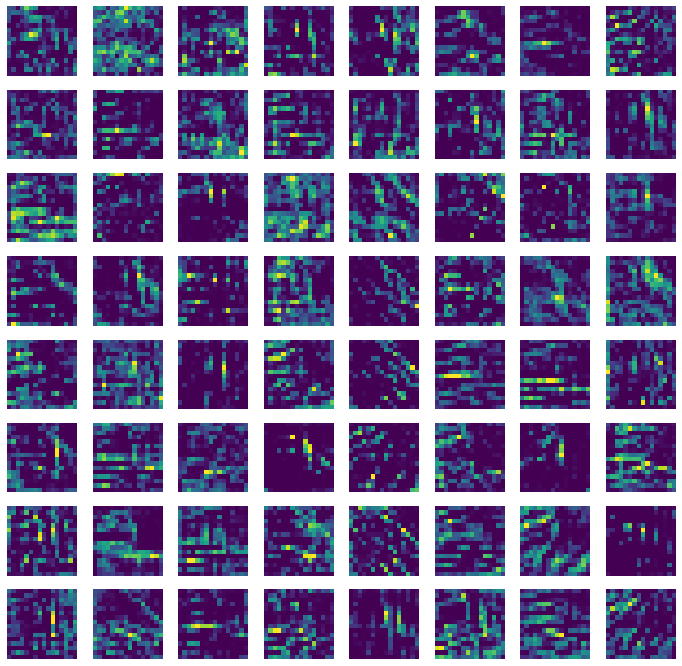

In [68]:
fig, ax = plt.subplots(8, 8, figsize = (12, 12))
for i in range(64):
    ax[i//8][i%8].imshow(f[3].numpy()[0, :, :, i].reshape(16, 16))
    ax[i//8][i%8].set_axis_off()

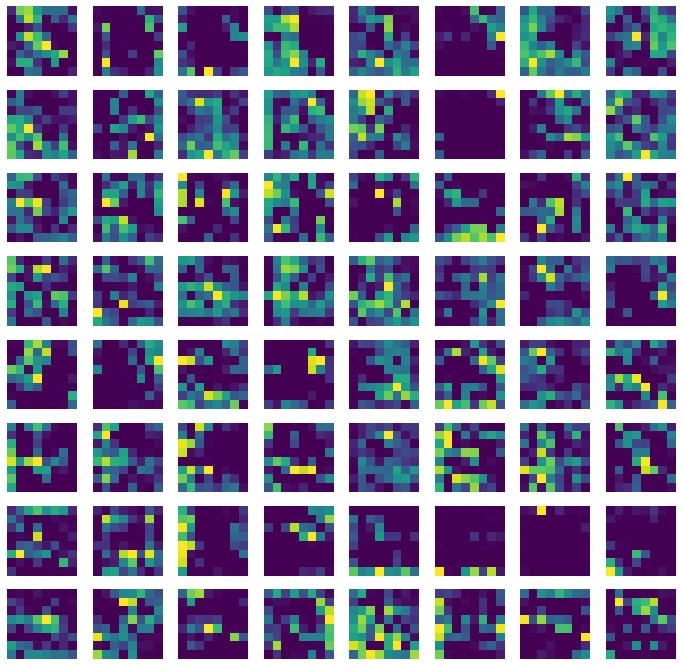

In [69]:
fig, ax = plt.subplots(8, 8, figsize = (12, 12))
for i in range(64):
    ax[i//8][i%8].imshow(f[4].numpy()[0, :, :, i].reshape(8, 8))
    ax[i//8][i%8].set_axis_off()